In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1) Phần này minh họa hình 3 trang 19**

**1.1) Define the distribution_function of 3 models: Exp-Unf, Gauss-claw & Gauss-Lap**

In [2]:
t = np.linspace(-5, 5, 10000)
pi = np.pi
## Distribution of gaussian
def phi(muy, sigma, t):
    phi = np.exp(-(t - muy)**2/(2*sigma**2))/np.sqrt(2*pi * sigma**2)
    return(phi)
## Distribution of Laplace
b = 1.5
def Lap(b, t):
    LG = np.exp(-np.abs(t)/(2*b))/(2*b)
    return(LG)
## Distribution of claw-gaussian
def claw(t):
    dclaw = 0.5*phi(0, 1, t) + 0.1*(phi(-1, 0.1, t) + phi(-0.5, 0.1, t) + phi(0, 0.1, t) 
                                    + phi(0.5, 0.1, t) + phi(1, 0.1, t))
    return(dclaw)
## exponential distribution
def Exp(t):
    dexp = np.exp(-t)*(t >= 0)
    return(dexp)

## Define a function of the family of Discriminator
def D_alpha(t, alpha0, alpha1):
    z = 1/(1 + (alpha1/ alpha0)*np.exp((t**2/2)*(alpha1**-2 - alpha0**-2) ) )
    return(z)

**Display the plots**

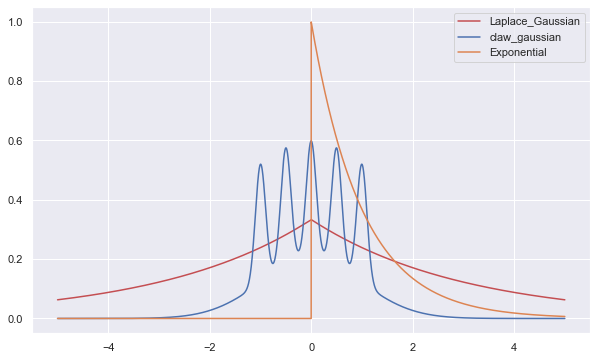

In [3]:
sns.set(rc = {"figure.figsize" : (10, 6)})
plt.plot(t, Lap(b, t), 'r', label= 'Laplace_Gaussian')
plt.plot(t, claw(t), label = 'claw_gaussian')
plt.plot(t, Exp(t), label = 'Exponential')
plt.legend(loc='best')
plt.show()

**2) Phần này minh họa thuật toán phát sinh boxplot theta.hat và theta.bar**

$$ \hat{\theta} - \bar{\theta} $$

**2.1. Cho mô hình Laplace - Gaussian**

In [4]:
def bxplot_laplace_gauss(ss, iters, loc=0, scale=1):
    theta_hat = []
    for k in range(iters):
        x = []
        for k in range(ss):
            y = np.random.laplace(loc, scale) - np.random.normal(loc, scale)
            x.append(y)
        theta_hat.append(np.mean(x))
    theta = theta_hat - np.mean(theta_hat)  ## since theta_bar = mean-values of theta_hat 
    return theta

## Checking the dimension
bxplot_laplace_gauss(ss=10, iters=200).shape

(200,)

C:\Users\Administrator\AppData\Local\conda\conda\envs\evNhan\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


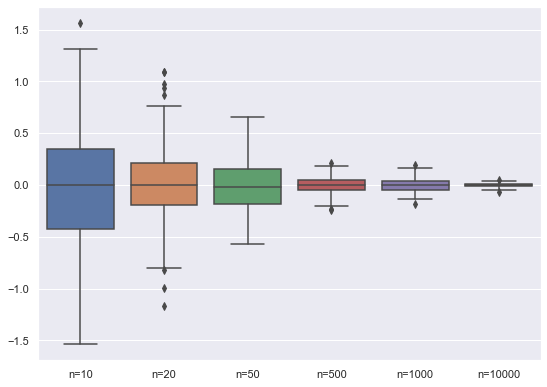

In [5]:
samp_size = [10, 20, 50, 500, 1000, 10000]
titles = ['n=10', 'n=20', 'n=50', 'n=500', 'n=1000', 'n=10000']
data1 = np.stack((bxplot_laplace_gauss(ss = k, iters = 200) for k in samp_size), axis=1)
df1 = pd.DataFrame(data1, columns = titles)
sns.set(rc = {"figure.figsize" : (9, 6.5)})
sns.boxplot(data = df1)

**2.2) Claw-Gaussian**

C:\Users\Administrator\AppData\Local\conda\conda\envs\evNhan\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  app.launch_new_instance()


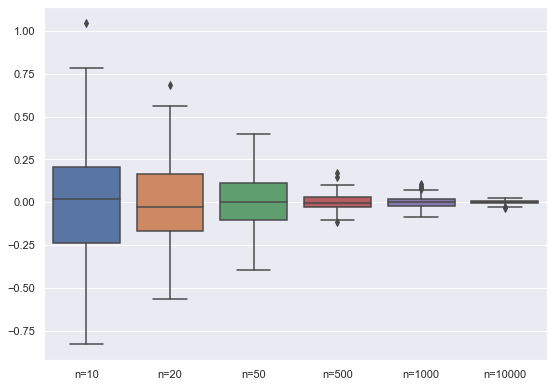

In [6]:
def bxplot_claw_gauss(ss, iters):
    theta_hat = []
    for k in range(iters):
        x = []
        for k in range(ss):
            y = 0.5*np.random.uniform(0, 1) + 0.1*(np.random.uniform(-1, 0.1)
                    + np.random.uniform(-0.5, 0.1)
                    + np.random.uniform(0, 0.1)
                    + np.random.uniform(0.5, 0.1)
                    + np.random.uniform(1, 0.1) ) - np.random.normal(0, 1)
            x.append(y)
        theta_hat.append(np.mean(x))
    theta = theta_hat - np.mean(theta_hat)
    return theta

data2 = np.stack((bxplot_claw_gauss(ss = k, iters = 200) for k in samp_size), axis=1)
df2 = pd.DataFrame(data2, columns = titles)
sns.set(rc = {"figure.figsize" : (9, 6.5)})
sns.boxplot(data = df2)

**2.3) Exponential-Uniform**

C:\Users\Administrator\AppData\Local\conda\conda\envs\evNhan\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if sys.path[0] == '':


Text(0.5, 1.0, 'Exp- Uniform Model')

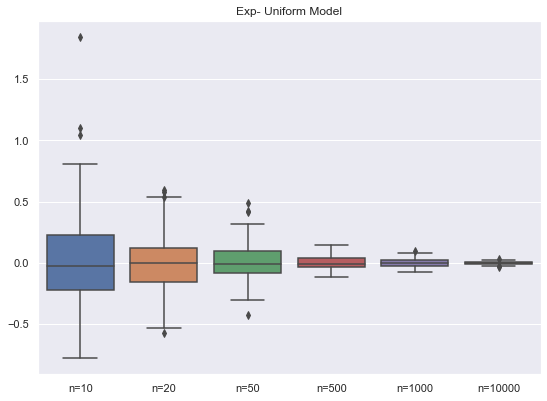

In [7]:
def bxplot_exp_unif(ss, iters, b=1):
    theta_hat = []
    for k in range(iters):
        x = []
        for k in range(ss):
            y = np.random.exponential(scale=b) - np.random.uniform(0, 1)
            x.append(y)
        theta_hat.append(np.mean(x))
    theta = theta_hat - np.mean(theta_hat)
    return theta
    
data3 = np.stack((bxplot_exp_unif(ss = k, iters = 200, b=1) for k in samp_size), axis=1)
df3 = pd.DataFrame(data3, columns = titles)
sns.boxplot(data = df3)
sns.set(rc = {"figure.figsize" : (9, 6.5)})
plt.title('Exp- Uniform Model')

**3) Histogram cho các ước lượng**
$$ \sqrt{n} * \left( \hat{\theta} - \bar{\theta} \right) $$

**3.1 Laplace - Gaussian model**

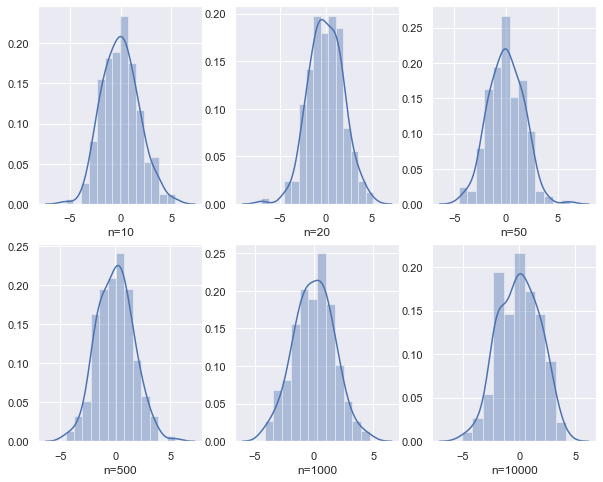

In [8]:
sns.set(rc = {"figure.figsize" : (10, 8)})
for k in range(6):
    plt.subplot(2, 3, k+1)
    nk = samp_size[k]
    x = np.sqrt(nk)*bxplot_laplace_gauss(ss = nk, iters = 200)
    sns.distplot(x)
    plt.xlabel(titles[k])

**3.2) Claw-Gaussian**

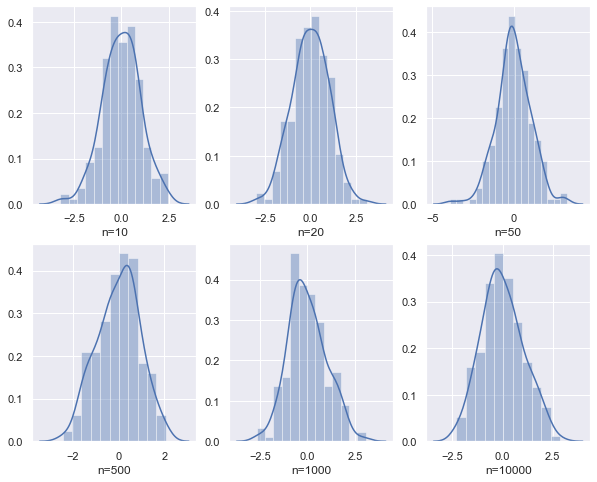

In [9]:
sns.set(rc = {"figure.figsize" : (10, 8)})
for k in range(6):
    plt.subplot(2, 3, k+1)
    nk = samp_size[k]
    x = np.sqrt(nk)*bxplot_claw_gauss(ss = nk, iters = 200)
    sns.distplot(x)
    plt.xlabel(titles[k])

**3.3) Exponential-Uniform model**

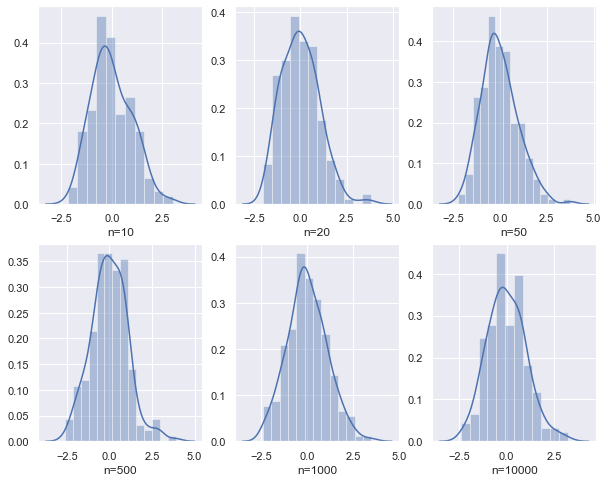

In [10]:
sns.set(rc = {"figure.figsize" : (10, 8)})
for k in range(6):
    plt.subplot(2, 3, k+1)
    nk = samp_size[k]
    x = np.sqrt(nk)*bxplot_exp_unif(ss = nk, iters = 200, b=1)
    sns.distplot(x)
    plt.xlabel(titles[k])

**Fig 7. The function of true_density, est_density & Discriminators**

**4.1. For Laplace Gaussian model**

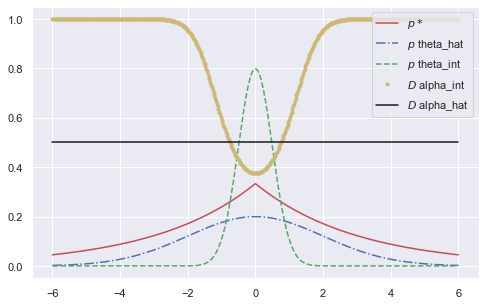

In [11]:
t = np.linspace(-6, 6, 500)
p_star = Lap(1.5, t) ## density of theta_star
p_tthat = phi(0, 2, t) ## density of theta_hat
p_ttint = phi(0, 0.5, t) ## density of theta_intitial
D_alint = D_alpha(t, 0.6, 1.) ## distribution of D_alpha_initial
D_alhat = 0.5*(t >= min(t))*(t <= max(t))

sns.set(rc = {"figure.figsize" : (8, 5)})
plt.plot(t, p_star, 'r-', label = '$p*$')
plt.plot(t, p_tthat, 'b-.', label = '$p$ theta_hat')
plt.plot(t, p_ttint, 'g--', label = '$p$ theta_int')
plt.plot(t, D_alint, 'y.', label = '$D$ alpha_int')
plt.plot(t, D_alhat, 'k', label = '$D$ alpha_hat')
plt.legend(loc = 'upper right')

**4.2. For Claw - Gaussian model**

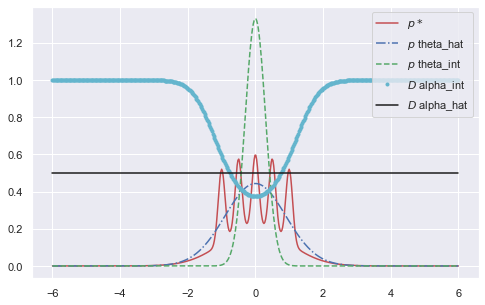

In [12]:
t = np.linspace(-6, 6, 500)
p_star = claw(t) ## density of theta_star
p_tthat = phi(0, 0.9, t) ## density of theta_hat
p_ttint = phi(0, 0.3, t) ## density of theta_intitial
D_alint = D_alpha(t, 0.6, 1.) ## distribution of D_alpha_initial
D_alhat = 0.5*(t >= min(t))*(t <= max(t))

sns.set(rc = {"figure.figsize" : (8, 5)})
plt.plot(t, p_star, 'r-', label = '$p*$')
plt.plot(t, p_tthat, 'b-.', label = '$p$ theta_hat')
plt.plot(t, p_ttint, 'g--', label = '$p$ theta_int')
plt.plot(t, D_alint, 'c.', label = '$D$ alpha_int')
plt.plot(t, D_alhat, 'k', label = '$D$ alpha_hat')
plt.legend(loc = 'upper right')

**4.3. For Exponential-Uniform model**

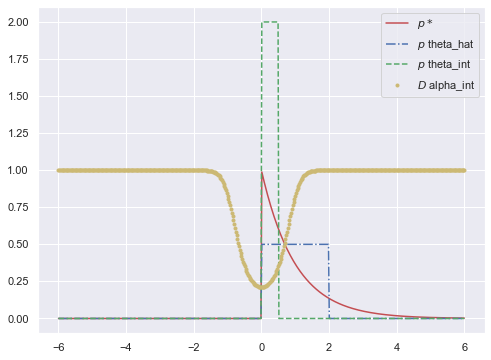

In [13]:
t = np.linspace(-6, 6, 500)
p_star = Exp(t) ## density of theta_star
p_tthat = 0.5*(t >= 0)*(t <= 2) ## density of theta_hat
p_ttint = 2*(t >= 0)*(t <= 0.5) ## density of theta_intitial
D_alint = D_alpha(t, 0.4, 1.5) ## distribution of D_alpha_initial

sns.set(rc = {"figure.figsize" : (8, 5)})
plt.plot(t, p_star, 'r-', label = '$p*$')
plt.plot(t, p_tthat, 'b-.', label = '$p$ theta_hat')
plt.plot(t, p_ttint, 'g--', label = '$p$ theta_int')
plt.plot(t, D_alint, 'y.', label = '$D$ alpha_int')
plt.legend()